In [1]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
# device = torch.device("cpu")
device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f"Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3")

99 4525.3115234375
199 3007.236083984375
299 1999.9383544921875
399 1331.40234375
499 887.5914306640625
599 592.8893432617188
699 397.1455078125
799 267.09283447265625
899 180.65875244140625
999 123.19529724121094
1099 84.97883605957031
1199 59.5537223815918
1299 42.63179016113281
1399 31.364652633666992
1499 23.85948371887207
1599 18.857807159423828
1699 15.52299690246582
1799 13.298460006713867
1899 11.813699722290039
1999 10.822175979614258
Result: y = -0.020060185343027115 + 0.8173043131828308 x + 0.0034607136622071266 x^2 + -0.08772088587284088 x^3


In [2]:
import torch

dtype = torch.float32
x = torch.tensor(1.0, dtype=dtype)
y_learn = torch.tensor(2.0, dtype=dtype)
w = torch.tensor(1.0, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
number_of_interation = 2000
for i in range(number_of_interation):
    y_pred = w * x

    loss = (y_learn - y_pred) ** 2

    loss.backward()
    with torch.no_grad():
        w -= learning_rate * w.grad

    if i % 99 == 0:
        print(loss)
    loss.zero_()

tensor(1., grad_fn=<PowBackward0>)
tensor(0.9803, grad_fn=<PowBackward0>)
tensor(0.9232, grad_fn=<PowBackward0>)
tensor(0.8332, grad_fn=<PowBackward0>)
tensor(0.7172, grad_fn=<PowBackward0>)
tensor(0.5843, grad_fn=<PowBackward0>)
tensor(0.4448, grad_fn=<PowBackward0>)
tensor(0.3096, grad_fn=<PowBackward0>)
tensor(0.1892, grad_fn=<PowBackward0>)
tensor(0.0931, grad_fn=<PowBackward0>)
tensor(0.0286, grad_fn=<PowBackward0>)
tensor(0.0009, grad_fn=<PowBackward0>)
tensor(0.0121, grad_fn=<PowBackward0>)
tensor(0.0612, grad_fn=<PowBackward0>)
tensor(0.1445, grad_fn=<PowBackward0>)
tensor(0.2556, grad_fn=<PowBackward0>)
tensor(0.3856, grad_fn=<PowBackward0>)
tensor(0.5246, grad_fn=<PowBackward0>)
tensor(0.6617, grad_fn=<PowBackward0>)
tensor(0.7861, grad_fn=<PowBackward0>)
tensor(0.8883, grad_fn=<PowBackward0>)


In [3]:
import numpy as np
import torch

X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = 2 * np.array([1, 2, 3, 4], dtype=np.float32)
w = 0.0


def forward(x):
    return w * x


def loss(y, y_pred):
    return ((y - y_pred) ** 2).mean()


def gradient(x, y, y_predicted):
    return np.dot(2 * x, y_predicted - y).mean()


print(f"Prediction before training: f(5) = {forward(5):.3f}")

learning_rate = 1e-2
number_of_interation = 20

for epoch in range(number_of_interation):
    y_pred = forward(X)
    l = loss(Y, y_pred)
    dw = gradient(X, Y, y_pred)
    w -= learning_rate * dw
    print(f"epoch {epoch + 1}: w = {w:.3f}, loss = {l:8f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.000000
epoch 2: w = 1.680, loss = 4.799999
epoch 3: w = 1.872, loss = 0.768000
epoch 4: w = 1.949, loss = 0.122880
epoch 5: w = 1.980, loss = 0.019661
epoch 6: w = 1.992, loss = 0.003146
epoch 7: w = 1.997, loss = 0.000503
epoch 8: w = 1.999, loss = 0.000081
epoch 9: w = 1.999, loss = 0.000013
epoch 10: w = 2.000, loss = 0.000002
epoch 11: w = 2.000, loss = 0.000000
epoch 12: w = 2.000, loss = 0.000000
epoch 13: w = 2.000, loss = 0.000000
epoch 14: w = 2.000, loss = 0.000000
epoch 15: w = 2.000, loss = 0.000000
epoch 16: w = 2.000, loss = 0.000000
epoch 17: w = 2.000, loss = 0.000000
epoch 18: w = 2.000, loss = 0.000000
epoch 19: w = 2.000, loss = 0.000000
epoch 20: w = 2.000, loss = 0.000000


In [4]:
import torch

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = 2 * X

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)


def forward(x):
    return w * x


def loss(y: torch.tensor, y_pred: torch.tensor):
    return ((y_pred - y) ** 2).mean()


print(f"Prediction before training: f(5) = {forward(5):.3f}")

learning_rate = 1e-2
number_of_interation = 200


for epoch in range(number_of_interation):
    y_pred = forward(X)
    l = loss(Y, y_pred)
    l.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad
    w.grad.zero_()
    if epoch % 10 == 0:
        print(f"epoch {epoch + 1}: w = {w:.3f}, loss = {l:8f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.000000
epoch 11: w = 1.665, loss = 1.162786
epoch 21: w = 1.934, loss = 0.045069
epoch 31: w = 1.987, loss = 0.001747
epoch 41: w = 1.997, loss = 0.000068
epoch 51: w = 1.999, loss = 0.000003
epoch 61: w = 2.000, loss = 0.000000
epoch 71: w = 2.000, loss = 0.000000
epoch 81: w = 2.000, loss = 0.000000
epoch 91: w = 2.000, loss = 0.000000
epoch 101: w = 2.000, loss = 0.000000
epoch 111: w = 2.000, loss = 0.000000
epoch 121: w = 2.000, loss = 0.000000
epoch 131: w = 2.000, loss = 0.000000
epoch 141: w = 2.000, loss = 0.000000
epoch 151: w = 2.000, loss = 0.000000
epoch 161: w = 2.000, loss = 0.000000
epoch 171: w = 2.000, loss = 0.000000
epoch 181: w = 2.000, loss = 0.000000
epoch 191: w = 2.000, loss = 0.000000


In [5]:
import torch
import torch.nn as nn

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = 2 * X

X_test = torch.tensor([5], dtype=torch.float32)

number_of_samples, number_of_features = X.shape
print(number_of_samples, number_of_features)
input_size = number_of_features
output_size = number_of_features
model = nn.Linear(input_size, output_size)
print(f"Prediction before training: f(5) = {model(X_test).item():.3f}")
learning_rate = 1e-1
number_of_interation = 2000

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print(f"Prediction after training: f(5) = {model(X_test).item():.3f}")

for epoch in range(number_of_interation):
    y_pred = model(X)
    l = loss(Y, y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()

    w.grad.zero_()
    [w, b] = model.parameters()
    if epoch % 10 == 0:
        print(f"epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:8f}")

4 1
Prediction before training: f(5) = 2.308
Prediction after training: f(5) = 2.308
epoch 1: w = 3.029, loss = 19.873919
epoch 11: w = 2.055, loss = 0.008711
epoch 21: w = 2.028, loss = 0.001144
epoch 31: w = 2.020, loss = 0.000621
epoch 41: w = 2.015, loss = 0.000338
epoch 51: w = 2.011, loss = 0.000184
epoch 61: w = 2.008, loss = 0.000100
epoch 71: w = 2.006, loss = 0.000055
epoch 81: w = 2.004, loss = 0.000030
epoch 91: w = 2.003, loss = 0.000016
epoch 101: w = 2.002, loss = 0.000009
epoch 111: w = 2.002, loss = 0.000005
epoch 121: w = 2.001, loss = 0.000003
epoch 131: w = 2.001, loss = 0.000001
epoch 141: w = 2.001, loss = 0.000001
epoch 151: w = 2.001, loss = 0.000000
epoch 161: w = 2.000, loss = 0.000000
epoch 171: w = 2.000, loss = 0.000000
epoch 181: w = 2.000, loss = 0.000000
epoch 191: w = 2.000, loss = 0.000000
epoch 201: w = 2.000, loss = 0.000000
epoch 211: w = 2.000, loss = 0.000000
epoch 221: w = 2.000, loss = 0.000000
epoch 231: w = 2.000, loss = 0.000000
epoch 241: w 

In [6]:
import torch
import torch.nn as nn

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = 2 * X

X_test = torch.tensor([5], dtype=torch.float32)

number_of_samples, number_of_features = X.shape
print(number_of_samples, number_of_features)
input_size = number_of_features
output_size = number_of_features


class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)


model = LinearRegression(input_size, output_size)

print(f"Prediction before training: f(5) = {model(X_test).item():.3f}")
learning_rate = 1e-1
number_of_interation = 2000

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print(f"Prediction after training: f(5) = {model(X_test).item():.3f}")

for epoch in range(number_of_interation):
    y_pred = model(X)
    l = loss(Y, y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()

    w.grad.zero_()
    [w, b] = model.parameters()
    if epoch % 10 == 0:
        print(f"epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:8f}")

4 1
Prediction before training: f(5) = 0.903
Prediction after training: f(5) = 0.903
epoch 1: w = 3.212, loss = 27.745468
epoch 11: w = 2.062, loss = 0.011794
epoch 21: w = 2.031, loss = 0.001397
epoch 31: w = 2.022, loss = 0.000759
epoch 41: w = 2.016, loss = 0.000413
epoch 51: w = 2.012, loss = 0.000225
epoch 61: w = 2.009, loss = 0.000122
epoch 71: w = 2.007, loss = 0.000067
epoch 81: w = 2.005, loss = 0.000036
epoch 91: w = 2.004, loss = 0.000020
epoch 101: w = 2.003, loss = 0.000011
epoch 111: w = 2.002, loss = 0.000006
epoch 121: w = 2.001, loss = 0.000003
epoch 131: w = 2.001, loss = 0.000002
epoch 141: w = 2.001, loss = 0.000001
epoch 151: w = 2.001, loss = 0.000001
epoch 161: w = 2.000, loss = 0.000000
epoch 171: w = 2.000, loss = 0.000000
epoch 181: w = 2.000, loss = 0.000000
epoch 191: w = 2.000, loss = 0.000000
epoch 201: w = 2.000, loss = 0.000000
epoch 211: w = 2.000, loss = 0.000000
epoch 221: w = 2.000, loss = 0.000000
epoch 231: w = 2.000, loss = 0.000000
epoch 241: w 

# Linear regression

pre reshape y.shape = torch.Size([100])
post reshape (y.view(y.shape[0], 1)): y.shape = torch.Size([100, 1])
epoch: 200, loss = 342.4890
epoch: 400, loss = 332.5870
epoch: 600, loss = 332.5676
epoch: 800, loss = 332.5676
epoch: 1000, loss = 332.5676
epoch: 1200, loss = 332.5676
epoch: 1400, loss = 332.5676
epoch: 1600, loss = 332.5676
epoch: 1800, loss = 332.5676
epoch: 2000, loss = 332.5676


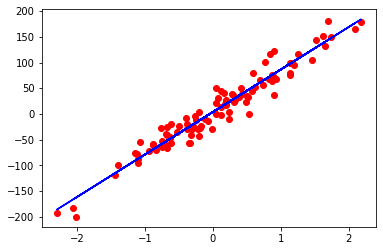

In [7]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0. prepare data
X_numpy, y_numpy = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=1
)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(f"pre reshape y.shape = {y.size()}")
y = y.view(y.shape[0], 1)
print(f"post reshape (y.view(y.shape[0], 1)): y.shape = {y.size()}")

n_samples, n_features = X.shape
# 1. model (linear regression (one layer))
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)
# 2. loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# 3. training loop
num_epochs = 2000
for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)
    # bacward pass
    loss.backward()

    # update
    optimizer.step()
    optimizer.zero_grad()

    # print some info
    if (epoch + 1) % 200 == 0:
        print(f"epoch: {epoch + 1}, loss = {loss.item():.4f}")

# plot
predicted = model(X).detach().numpy()  # detach -- no grad?
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()

# Logistic regression   

In [8]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0. prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)  # 20% -- test
# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1. model
# f = wx + b, sigmoid at the end


class LogisticRegression(nn.Module):
    def __init__(self, n_input_features) -> None:
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted


model = LogisticRegression(n_features)

# 2. loss and optimizer
learning_rate = 1e-2
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3. training loop
num_epochs = 2000
for epoch in range(num_epochs):
    # forward and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # backward pass
    loss.backward()

    # updates
    optimizer.step()

    # zero gradients!
    optimizer.zero_grad()

    if (epoch + 1) % 200 == 0:
        print(f"epoch: {epoch + 1} loss = {loss.item():.4}")
with torch.no_grad():
    y_pred = model(X_test)
    y_predicted_cls = y_pred.round()  # 0 - 1
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f"Accuracy = {acc:.4f}")

569 30
epoch: 200 loss = 0.1839
epoch: 400 loss = 0.1338
epoch: 600 loss = 0.1122
epoch: 800 loss = 0.0997
epoch: 1000 loss = 0.09126
epoch: 1200 loss = 0.08507
epoch: 1400 loss = 0.08027
epoch: 1600 loss = 0.07641
epoch: 1800 loss = 0.0732
epoch: 2000 loss = 0.07048
Accuracy = 0.9561


# Batches and load data from file

In [22]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math


class WineDataset(Dataset):
    def __init__(self) -> None:
        # data loading
        xy = np.loadtxt("./data/wine.csv", delimiter=",", dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]])  # n_samples, 1 new array
        self.n_samples = xy.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.n_samples


dataset = WineDataset()
dataloader = DataLoader(
    dataset=dataset, batch_size=4, shuffle=True, num_workers=12
)  # batch size = 4
# dataiter = iter(dataloader)
# data = dataiter.next()
# features, labels = data
# print(features, labels)

# training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples / float(4))
print(total_samples, n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward bacward, update
        if (i + 1) % 5 == 0:
            print(
                f"epoch: {epoch + 1}/{num_epochs}, step {i + 1}/{n_iterations}, inputs {inputs.shape}"
            )

178 45
epoch: 1/2, step 5/45, inputs torch.Size([4, 13])
epoch: 1/2, step 10/45, inputs torch.Size([4, 13])
epoch: 1/2, step 15/45, inputs torch.Size([4, 13])
epoch: 1/2, step 20/45, inputs torch.Size([4, 13])
epoch: 1/2, step 25/45, inputs torch.Size([4, 13])
epoch: 1/2, step 30/45, inputs torch.Size([4, 13])
epoch: 1/2, step 35/45, inputs torch.Size([4, 13])
epoch: 1/2, step 40/45, inputs torch.Size([4, 13])
epoch: 1/2, step 45/45, inputs torch.Size([2, 13])
epoch: 2/2, step 5/45, inputs torch.Size([4, 13])
epoch: 2/2, step 10/45, inputs torch.Size([4, 13])
epoch: 2/2, step 15/45, inputs torch.Size([4, 13])
epoch: 2/2, step 20/45, inputs torch.Size([4, 13])
epoch: 2/2, step 25/45, inputs torch.Size([4, 13])
epoch: 2/2, step 30/45, inputs torch.Size([4, 13])
epoch: 2/2, step 35/45, inputs torch.Size([4, 13])
epoch: 2/2, step 40/45, inputs torch.Size([4, 13])
epoch: 2/2, step 45/45, inputs torch.Size([2, 13])


# Dataset transorms

## Расширяем класс данных до возможности преобразований, что может помочь 

In [4]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math


class WineDataset(Dataset):
    def __init__(self, transform=None) -> None:
        # data loading
        xy = np.loadtxt("./data/wine.csv", delimiter=",", dtype=np.float32, skiprows=1)
        self.x = xy[:, 1:]
        self.y = xy[:, [0]]  # n_samples, 1 new array
        self.n_samples = xy.shape[0]
        self.transfom = transform

    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transfom:
            sample = self.transfom(sample)
        return sample

    def __len__(self):
        return self.n_samples


class ToTensor:
    def __call__(self, sample) -> None:
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)


class MulTransform:
    def __init__(self, factor) -> None:
        self.factor = factor

    def __call__(self, sample):
        inputs, target = sample
        inputs *= self.factor
        return inputs, target


dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


# Softmax and Cross entropy

cross entropy: $$ D(\hat Y, Y) = - \frac{1}{N} \sum Y_i \log(\hat Y_i)$$
softmax: $$ S(y_i) = \frac{e^{y_i}}{\sum e^{y_j}}$$ 
***
*Примечания*
> 1. softmax нельзя внедрять в последний слой, т.е. можно внедрять только в скрытые слои.

> 2. Y -- not One-Hot!

> 3. Y_pred -- no Softmax


_numpy_
``` python
def cross_entropy(actual, predicted):
    loss = - np.sum(actual * np.log(predicted))
    return loss

```

``` python'
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0
```
_pytorch_
``` python
loss = nn.CrossEntropyLoss()
softmax = torch.softmax
```

_example 0_
```python
import torch
import torch.nn as nn 
import numpy as np

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
loss = nn.CrossEntropyLoss()

Y = torch.tensor([0])
# nsamples x nclasses = 1 * 3 -- один образец и 3 возможных класса
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item(), l2.item())
```
_output_example_0_
```
 0.4170299470424652 1.840616226196289 
```
___
_example 1_
```
import torch
import torch.nn as nn 
import numpy as np

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
loss = nn.CrossEntropyLoss()
# samples
Y = torch.tensor([2, 0, 1])
# number of prognoses = nsamples x nclasses = 3 * 3 -- один образец и 3 возможных класса
Y_pred_good = torch.tensor([[0.0, 1.0, 2.1], [2.0, 1.0, 0.1], [2.0, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [2.0, 3.0, 0.1]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item(), l2.item())

_, predictions1 = torch.max(Y_pred_good, axis=1)
_, predictions2 = torch.max(Y_pred_bad, axis=1)
print(predictions1, predictions2)
```

_output_example_1_
```
 0.4170299470424652 1.840616226196289 
```

In [17]:
import torch
import torch.nn as nn
import numpy as np

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
loss = nn.CrossEntropyLoss()
# samples
Y = torch.tensor([2, 0, 1])
# number of prognoses = nsamples x nclasses = 3 * 3 -- один образец и 3 возможных класса
Y_pred_good = torch.tensor([[0.0, 1.0, 2.1], [2.0, 1.0, 0.1], [2.0, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [2.0, 3.0, 0.1]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item(), l2.item())

_, predictions1 = torch.max(Y_pred_good, axis=1)
_, predictions2 = torch.max(Y_pred_bad, axis=1)
print(predictions1, predictions2)

0.38165321946144104 1.7069271802902222
tensor([2, 0, 1]) tensor([0, 2, 1])


# Multi class

In [ ]:
import torch
import torch.nn as nn


class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes) -> None:
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out


model = NeuralNet2(input_size=28 * 28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()

# Binary class 
## yes or no 

In [ ]:
import torch
import torch.nn as nn


class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size) -> None:
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred


model = NeuralNet2(input_size=28 * 28, hidden_size=5)
criterion = (
    nn.BCELoss()
)  # двоичная перекрестная функция потери энтропии (для бинарных классификаторов)

# Feed-Forward Neural Network
## MNIST database

device = cuda
torch.Size([100, 1, 28, 28]) torch.Size([100])


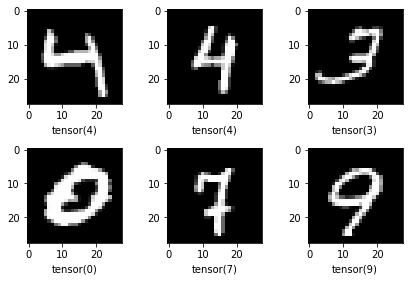

In [12]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device('cpu')
print(f"device = {device}")
# hyper parameters
input_size = 28 * 28  # image size 28 x 28 = 784
hidden_size = 2000
num_classes = 10  # 0 1 2 3 4 5 6 7 8 9
num_epochs = 20  # or more
batch_size = 100
learning_rate = 1e-3
# MNIST
train_dataset = torchvision.datasets.MNIST(
    root=".data/", train=True, transform=transforms.ToTensor(), download=True
)

test_dataset = torchvision.datasets.MNIST(
    root=".data/", train=False, transform=transforms.ToTensor(), download=False
)

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False
)
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(samples[i, 0], cmap="gray")
    plt.xlabel(labels[i])
plt.tight_layout()
plt.show()

In [13]:
# model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes) -> None:
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out


class NeuralNet2h(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes) -> None:
        super(NeuralNet2h, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.l3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        return out


model = NeuralNet2h(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for name, param in model.named_parameters():
    if name == "lif.recurrent_weights":
        prev_weights = param
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28 -> 100, 784 => reshape
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(
                f"epoch: {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}"
            )

# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for image, labels in test_loader:
        image = image.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(image)
        # value, index. Our index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().cpu().item()
acc = 100.0 * n_correct / n_samples
print(f"accuracy = {acc}")

for name, param in model.named_parameters():
    if name == "lif.recurrent_weights":
        post_weights = param

epoch: 1/20, step 100/600, loss = 0.1907
epoch: 1/20, step 200/600, loss = 0.1724
epoch: 1/20, step 300/600, loss = 0.0878
epoch: 1/20, step 400/600, loss = 0.1381
epoch: 1/20, step 500/600, loss = 0.0800
epoch: 1/20, step 600/600, loss = 0.2884
epoch: 2/20, step 100/600, loss = 0.1383


KeyboardInterrupt: 

# CNN with CIFAR-10 dataset

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyper-parameters
num_epochs = 4
batch_size = 4
learning_rate = 1e-3

# 0. prepare dataset
# dataset has PILImage of range [0, 1]
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)


train_dataset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=False, transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False
)
classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

# 1. model
class ConNet(nn.Module):
    def __init__(self) -> None:
        self.conv1 = nn.Conv2d(
            3, 6, 5
        )  # 3 color_channels, 5 -- core size and 6 -- output size
        self.pool = nn.MaxPool2d(2, 2)  # size and step
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        super().__init__()

    def forward(self, x):
        pass


# 2. loss and optimizer

# 3. train

Files already downloaded and verified


In [6]:
import torch, torch.nn as nn
from norse.torch import LICell  # Leaky integrator
from norse.torch import LIFCell  # Leaky integrate-and-fire
from norse.torch import SequentialState  # Stateful sequential layers

model = SequentialState(
    nn.Conv2d(1, 20, 5, 1),  # Convolve from 1 -> 20 channels
    LIFCell(),  # Spiking activation layer
    nn.MaxPool2d(2, 2),
    nn.Conv2d(20, 50, 5, 1),  # Convolve from 20 -> 50 channels
    LIFCell(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),  # Flatten to 800 units
    nn.Linear(800, 10),
    LICell(),  # Non-spiking integrator layer
)

data = torch.randn(8, 1, 28, 28)  # 8 batches, 1 channel, 28x28 pixels
output, state = model(data)  # Provides a tuple (tensor (8, 10), neuron state)

AttributeError: 'LIFFeedForwardState' object has no attribute 'numpy'

In [9]:
import norse
import torch
import norse.torch as snn
import numpy as np
import matplotlib.pyplot as plt

data = torch.randn(100000, 1, 20) * 1  # 10 timesteps, 1 bathces, 2 neurons
voltage = np.zeros((4, data.shape[0]))
spikes = np.zeros((4, data.shape[0]))

In [195]:
outputs = l(data)
outputs[0].size()
plt.plot(outputs[0][:, 0, 0].detach().cpu().numpy(), ".")

In [173]:
output, state = l(data[i, ...], state=state)
state[1].v

tensor([-0.9037, -0.0672,  0.3875,  0.1483], grad_fn=<AddBackward0>)

In [150]:
l(data)[0].size()
output, state = l(data[0, ...])
%matplotlib
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(l(data)[0][:, 0, i].detach().numpy(), ".")
    plt.plot(voltage[i])
    plt.xlabel(i + 1)
plt.tight_layout()
plt.show()

Using matplotlib backend: TkAgg


In [154]:
just_lif = norse.torch.LIF(2, 4, recurrent_weights=recurent_weights)

TypeError: __init__() takes from 1 to 2 positional arguments but 3 were given

In [166]:
output, state = l(data[0, ...])
l(data[0])

(tensor([[-0.2564, -0.3798,  0.0463, -0.3936]], grad_fn=<AddmmBackward0>),
 [None,
  LIFState(z=tensor([0., 0., 0., 0.], grad_fn=<CppNode<SuperFunction>>), v=tensor([0., 0., 0., 0.], grad_fn=<AddBackward0>), i=tensor([0.4378, 0.1181, 0.0123, 0.3152], grad_fn=<AddBackward0>)),
  None])

In [162]:
print(data[0].size())

torch.Size([1, 2])
